In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_pickle("../input/riiid-test-answer-prediction/train.pickle")

/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [3]:
df["user_id_div10"] = df["user_id"]%10

In [4]:
for user_id, w_df in df.groupby("user_id_div10"):
    w_df.drop(["user_id_div10", "row_id"], axis=1).to_pickle(f"../input/riiid-test-answer-prediction/split10/train_{user_id}.pickle")

In [315]:
random_add_dict = {}
for user_id in w_df["user_id"].drop_duplicates():
    random_add_dict[user_id] = random.random() * (4e+10)

In [316]:
w_df["add"] = w_df["user_id"].map(random_add_dict)

/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [317]:
w_df["timestamp_add"] = w_df["timestamp"] + w_df["add"]

/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [318]:
ww_df = w_df.sort_values("timestamp_add")

In [319]:
train = ww_df.iloc[:int(len(ww_df)*0.8)]["user_id"].value_counts()

In [320]:
val = ww_df.iloc[int(len(ww_df)*0.8):]["user_id"].value_counts()

In [321]:
merge = pd.merge(train.reset_index().rename(columns={"index": "user_id", "user_id": "count_train"}),
                 val.reset_index().rename(columns={"index": "user_id", "user_id": "count_val"}),
                 how="outer",
                 on="user_id")

In [322]:
merge

,user_id,count_train,count_val
0,689295320,14009.0,NaN
1,485906710,13567.0,NaN
2,1065666280,12907.0,1398.0
3,1277204940,12864.0,182.0
4,1249934440,12489.0,661.0
...,...,...,...
39286,1849563160,NaN,9.0
39287,2097432940,NaN,8.0
39288,2087557700,NaN,7.0
39289,1010164890,NaN,7.0


In [323]:
merge["val_ratio"] = merge["count_val"].fillna(0) / (merge["count_train"].fillna(0) + merge["count_val"].fillna(0)) 

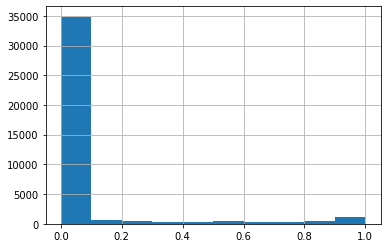

In [324]:
merge["val_ratio"].hist()

In [325]:
(merge["val_ratio"]  == 1).sum()

587

In [326]:
(merge["val_ratio"]  == 0).sum()

33853

In [289]:
df["timestamp"].describe()

count    1.012303e+08
mean     7.703644e+09
std      1.159266e+10
min      0.000000e+00
25%      5.243436e+08
50%      2.674234e+09
75%      9.924551e+09
max      8.742577e+10
Name: timestamp, dtype: float64

In [107]:
w_df[w_df["user_id"] == 689295320]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,user_id_div10,add,timestamp_add
32160394,32160394,0,689295320,4606,0,0,1,1,NaN,NaN,0,0.728269,7.282685e-01
32160395,32160395,16976,689295320,4724,0,1,0,0,5000.0,False,0,0.728269,1.697673e+04
32160396,32160396,52640,689295320,5738,0,2,2,1,13000.0,False,0,0.728269,5.264073e+04
32160397,32160397,79689,689295320,296,0,3,0,1,31000.0,False,0,0.728269,7.968973e+04
32160398,32160398,129412,689295320,6056,0,4,1,1,23000.0,False,0,0.728269,1.294127e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32174398,32174398,3798932664,689295320,5571,0,9999,2,1,4000.0,True,0,0.728269,3.798933e+09
32174399,32174399,4236965996,689295320,23717,1,8655,-1,-1,NaN,False,0,0.728269,4.236966e+09
32174400,32174400,5114206043,689295320,1937,0,4784,3,1,11000.0,True,0,0.728269,5.114206e+09
32174401,32174401,5114206043,689295320,1939,0,4784,2,1,11000.0,True,0,0.728269,5.114206e+09


In [105]:
merge

,user_id,count_train,count_val,val_ratio
0,689295320,14009,NaN,0.000000
1,485906710,13567,NaN,0.000000
2,1249934440,13150,NaN,0.000000
3,1277204940,13046,NaN,0.000000
4,280322800,11953,42.0,0.003501
...,...,...,...,...
39286,1231833900,1,NaN,0.000000
39287,196791300,1,17.0,0.944444
39288,1853579700,1,35.0,0.972222
39289,489368460,1,57.0,0.982759


In [95]:
w_df["user_id"].value_counts()

1065666280    14305
566248290     14113
1628208000    14077
689295320     14009
485906710     13567
              ...  
1240997940        1
2119645200        1
1610758750        1
2103184240        1
1632816630        1
Name: user_id, Length: 39291, dtype: int64

In [117]:
df[df["user_id"] == 1065666280].head(30)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,user_id_div10
50292639,50292639,0,1065666280,7900,0,0,0,1,NaN,NaN,0
50292640,50292640,21832,1065666280,7876,0,1,2,0,19000.0,False,0
50292641,50292641,41696,1065666280,175,0,2,0,0,20000.0,False,0
50292642,50292642,60348,1065666280,1278,0,3,0,0,18000.0,False,0
50292643,50292643,125088,1065666280,2065,0,4,1,0,16000.0,False,0
50292644,50292644,125088,1065666280,2063,0,4,3,0,16000.0,False,0
50292645,50292645,125088,1065666280,2064,0,4,2,0,16000.0,False,0
50292646,50292646,186135,1065666280,3365,0,5,3,0,20666.0,False,0
50292647,50292647,186135,1065666280,3363,0,5,1,0,20666.0,False,0
50292648,50292648,186135,1065666280,3364,0,5,2,0,20666.0,False,0


In [110]:
aa = df["user_id"].value_counts()

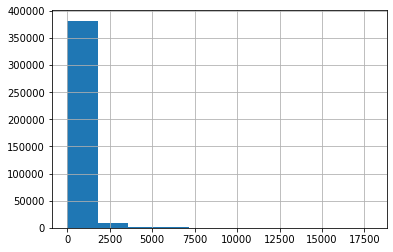

In [118]:
aa.hist()

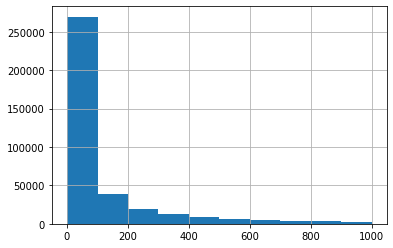

In [112]:
aa[aa<1000].hist()

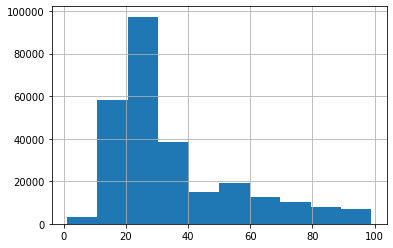

In [113]:
aa[aa<100].hist()